# This notebook runs on a Python3 kernel
No kernel changes required!

# Metrics on the C3 AI Suite

C3 Metrics are data used to quickly and scalably aggregate and transform raw data into time series. Metrics can be implemented in the platform or defined on the fly in a Python notebook or environment console. The list of transforms that can be used to define metrics is described in the `ExpressionEngineFunction` type.

C3 Metrics can be of 2 different types:
- `SimpleMetric` (including `TsDeclMetric`), which is for defining a way to access data and transform it
- `CompoundMetric` to do mathematical operations on other metrics

Each new metric becomes a new building block for more complex metrics. In the future if that building block changes (to fix a bug for example), all the metrics that depend on it will be modified automatically. That behavior makes metrics easy to define, maintain and share across your organization.

Data Scientists use metrics to explore the data and create features.

**Note** The cells below contain generic working code. You can edit the existing code or add additional cells as you'd like.

Import the necessary packages

In [1]:
import matplotlib
%matplotlib inline
from datetime import datetime
import pandas as pd
pd.options.display.max_colwidth = 1000
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

#### Use This Space for "CHALLENGE: Write Helper Functions for Metric Visualization" 
    
#### Skip this now and come back at the end of Section 3

In [ ]:
'''
FUTURE CHALLENGE - Skip for now
Implement helper function that takes an EvalMetricsSpec
and returns an appropriately formatted dataframe
(See demo video for example functionality)
'''

def spec_to_emr_to_df(source_type: object, spec: object, on_the_fly: bool, overrideMetrics: list):
    
    return 

In [ ]:
'''
FUTURE CHALLENGE - Skip for now
Implement helper function that takes in a dataframe, ids and expressions
and plots them using the plotting tool of your choice.
(See demo video for example of functionality using matplotlib)
'''
def plot_metrics(df, ids, expressions):
    
    return 


## 1. Evaluating Metrics Already Provisioned on the Server

The following block of code allows you to list all the Metrics available on a specified Type

In [3]:
metrics = pd.DataFrame(c3.Building.listMetrics().toJson())

In [4]:
metrics

,type,name,expression,meta,id,version,srcType,path,tsDecl
0,SimpleMetric,AverageTemperature,avg(avg(normalized.data.temperature)),"{'type': 'Meta', 'tenantTagId': 152, 'tenant': 'dev', 'tag': 'tc03d', 'created': '2022-06-19T22:54:33+00:00', 'createdBy': 'provisioner', 'updated': '2022-06-19T22:54:33+00:00', 'updatedBy': 'provisioner', 'timestamp': '2022-06-19T22:54:33+00:00', 'fetchInclude': '[]', 'fetchType': 'SimpleMetric'}",AverageTemperature_Building,1,"{'type': 'TypeRef', 'typeName': 'Building'}",apartments.fixtures.bulbHistory.from.bulbMeasurements,NaN
1,CompoundMetric,DayOfWeek,"timeComponent('DAYOFWEEK', start())","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",DayOfWeek,1,NaN,NaN,NaN
2,CompoundMetric,DayOfWeekDemo,"timeComponent('DAYOFWEEK', start())","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",DayOfWeekDemo,1,NaN,NaN,NaN
3,CompoundMetric,DayOfYear,"timeComponent('DAYOFYEAR', start())","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",DayOfYear,1,NaN,NaN,NaN
4,CompoundMetric,DaysInYear,"timeComponent('YEAR', start()) % 4 != 0 || (timeComponent('YEAR', start()) % 100 == 0 && timeComponent('YEAR', start()) % 400 != 0) ? 365 : 366","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",DaysInYear,1,NaN,NaN,NaN
5,CompoundMetric,HasEverFailed,"rolling('SUM',IsDefective) ? 1 : 0","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",HasEverFailed,1,NaN,NaN,NaN
6,CompoundMetric,Holiday,holiday(identity(1.0)),"{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",Holiday,1,NaN,NaN,NaN
7,CompoundMetric,HourOfDay,"timeComponent('HOUR', start())","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",HourOfDay,1,NaN,NaN,NaN
8,CompoundMetric,HourOfWeek,((DayOfWeek - 1) * 24) + HourOfDay,"{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",HourOfWeek,1,NaN,NaN,NaN
9,CompoundMetric,IsDefective,"or(eval('HOUR', AverageLumens == 0 && Status == 1 && PowerGridStatus == 1)) ? 1 : 0","{'type': 'Meta', 'fetchInclude': '[id,name,unit,expression,variables,tags,version,typeIdent]', 'fetchType': 'CompoundMetric'}",IsDefective,1,NaN,NaN,NaN


#### REMINDER:  `evalMetrics` or `evalMetricsWithMetadata`

* `evalMetrics`: to evaluate metrics already defined (i.e. provisioned) in C3 AI Suite environment
* `evalMetricsWithMetadata`: to evaluate metrics defined on the fly or already in C3 AI Suite. If you do this, you will need to pass in a second argument to this function that will be a list of the metrics that do not yet exist in a C3 Database.

Create EvalMetricsSpec:

In [7]:
my_spec = c3.EvalMetricsSpec(
            ids = ["bld1", "bld2"],
            expressions = ["AverageTemperature"],
            start = "2018-01-01",
            end = "2021-12-01",
            interval = "DAY" 
        )

Retrieve EvalMetricsResult:

In [8]:
evalMetricsResult = c3.Building.evalMetrics(spec=my_spec)
evalMetricsResult

c3.EvalMetricsResult(
 result=c3.Mapp<string, map<string,Timeseries>>({'bld1': c3.Mapp<string, Timeseries>({'AverageTemperature': c3.NormTimeseriesDouble(
                                          m_start=datetime.datetime(2018, 1, 1, 0, 0),
                                          m_end=datetime.datetime(2021, 12, 1, 0, 0),
                                          m_missing=c3.Arry<byte>([100,
                                                      100,
                                                      100,
                                                      ...,
                                                      100,
                                                      100,
                                                      100]),
                                          m_interval='DAY',
                                          m_timeZone='NONE',
                                          m_sourceInfo=c3.TimeseriesSourceInfo(
                                           

Convert to pandas dataframe:

In [9]:
df = c3.EvalMetricsResult.toPandas(evalMetricsResult)
df

,AverageTemperature
bld1_2018-01-01T00:00:00,0.0
bld1_2018-01-02T00:00:00,0.0
bld1_2018-01-03T00:00:00,0.0
bld1_2018-01-04T00:00:00,0.0
bld1_2018-01-05T00:00:00,0.0
...,...
bld2_2021-11-26T00:00:00,0.0
bld2_2021-11-27T00:00:00,0.0
bld2_2021-11-28T00:00:00,0.0
bld2_2021-11-29T00:00:00,0.0


In [10]:
df.describe()

,AverageTemperature
count,2860.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Add source and timestamp column to dataframe:

In [11]:
df['source'] = df.index.str.split('_').str[0]
df['timestamp'] = pd.to_datetime(df.index.str.split('_').str[1],format="%Y-%m-%dT%H:%M:%S.%f")
df

,AverageTemperature,source,timestamp
bld1_2018-01-01T00:00:00,0.0,bld1,2018-01-01
bld1_2018-01-02T00:00:00,0.0,bld1,2018-01-02
bld1_2018-01-03T00:00:00,0.0,bld1,2018-01-03
bld1_2018-01-04T00:00:00,0.0,bld1,2018-01-04
bld1_2018-01-05T00:00:00,0.0,bld1,2018-01-05
...,...,...,...
bld2_2021-11-26T00:00:00,0.0,bld2,2021-11-26
bld2_2021-11-27T00:00:00,0.0,bld2,2021-11-27
bld2_2021-11-28T00:00:00,0.0,bld2,2021-11-28
bld2_2021-11-29T00:00:00,0.0,bld2,2021-11-29


Plot metric:

<AxesSubplot:xlabel='timestamp'>

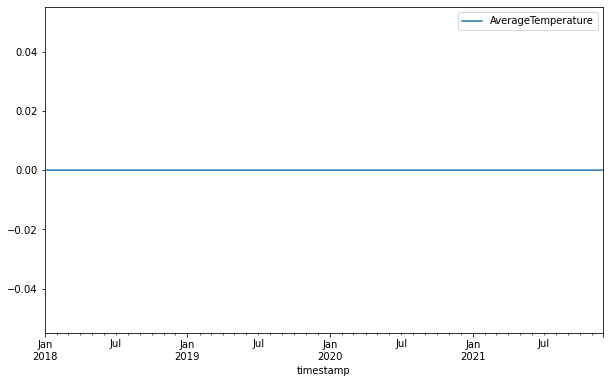

In [12]:
df[df['source']=='bld1'].plot(x='timestamp',y='AverageTemperature')
# df[df['source']=='id2'].plot(x='timestamp',y='MyExpression')

### Use This Space for "CHALLENGE: Visualize Metrics" 
    
    Add additional cells as needed.

## 2. Prototyping and Evaluating Simple Metrics

In [ ]:
bldMetrics = pd.DataFrame(c3.Building.listMetrics().toJson())
bldMetrics
# bldMetrics[bldMetrics['id'] == "AverageTemperature_Building"]

Define Simple Metric that you want to prototype:

In [ ]:
my_metric = c3.SimpleMetric(id = "MyMetric_MySrcType",
                            name = "MyMetric",
                            description = "description of the metric",
                            srcType = "MySrcType",
                            path = "MyPath",
                            expression = "MyExpression"
                           )
            
my_metric.toJson()

Create EvalMetricsSpec:

In [ ]:
my_spec = c3.EvalMetricsSpec(
            ids = ["UniqueId1", "UniqueId2"],
            expressions = ["MyMetric"],
            start = "2018-01-01",
            end = "2021-01-01",
            interval = "DAY" 
        )

Get EvalMetricsResult:

**Note**: We use `evalMetricsWithMetadata` while prototyping metrics

In [ ]:
evalMetricsResult = c3.MyEntityType.evalMetricsWithMetadata(spec=my_spec,
                                                      overrideMetrics=[my_metric])
evalMetricsResult

Convert to pandas dataframe:

In [ ]:
# convert EvalMetricsResult to Pandas DataFrame
df = c3.EvalMetricsResult.toPandas(result=evalMetricsResult)
df

Add source and timestamp column to dataframe:

In [ ]:
#Post process dataframe to add 'source' and 'timestamp' column
df['source'] = df.index.str.split('_').str[0]
df['timestamp'] = pd.to_datetime(df.index.str.split('_').str[1],format="%Y-%m-%dT%H:%M:%S.%f")
df

Plot metric:

In [ ]:
df[df['source']=='UniqueId1'].plot(x='timestamp',y='MyExpression')
df[df['source']=='UniqueId2'].plot(x='timestamp',y='MyExpression')

Now that you've prototyped and tested your metric, you need to create a json file for it (or add it to an existing json file) and provision it to the server so it will be available to run later or for use in compound metrics.

In [ ]:
# # You have 2 options to get your metric into a file -- comment in and use whichever one you prefer!

# # will print out the metric code directly, copy and paste in VS Code
# # recommended if you have an existing file and you simply want to copy and paste to add this metric in there
# my_metric.toJson() 


# # will write the metric to a json file named myMetric.json
# # recommended for one-off metrics or for Compound Metrics (in Section 4)
# import json
# with open('myMetric.json', 'w') as f:
#   json.dump(my_metric.toJson(), f, ensure_ascii=False)

### Use This Space for "CHALLENGE: Prototype Simple Metrics in Jupyter" 
    
    Add additional cells as needed.

## 3. Prototyping and Evaluating Simple `TSDecl` Metrics

Optional: compare data structures of SmartBulbMeasurement and PowerGridStatusSet

In [ ]:
# pd.DataFrame(c3.SmartBulbMeasurement.fetch(spec={
#     "filter": "parent == 'SBMS_serialNo_SMBLB1'",
#     "order": "ascending(start)"
# }).objs.toJson())

In [ ]:
# pd.DataFrame(c3.PowerGridStatusSet.fetch(spec={
#     "order": "ascending(timestamp)",
#     "filter": "parent.id == 'bld1'"
# }).objs.toJson())

View the documentation and fields on a TSDecl metric

In [ ]:
help(c3.TSDecl)

Define TSDecl Metric:

In [ ]:
myTsDeclMetric = c3.SimpleMetric(id = "MyTsDeclMetric_MySrcType",
                                 name = "MyTsDeclMetric",
                                 description = "description of the metric",
                                 srcType = "MySrcType",
                                 path = "MyPath",
                                 tsDecl = c3.TSDecl(data = "data",
                                                   value = "value",
                                                   treatment = "TREATMENT",
                                                   start = "timestampField"))

myTsDeclMetric.toJson()

Create EvalMetricsSpec:

In [ ]:
my_tsdecl_spec = c3.EvalMetricsSpec(ids = ["UniqueId1", "UniqueId2", "UniqueId3"],
                                    expressions = ["MyTsDeclMetric"],
                                    start = "2018-01-01",
                                    end = "2021-01-01",
                                    interval = "DAY")

In [ ]:
# # steps to visualize:
#   -- pass spec into EvalMetrics(WithMetadata) to be evaluated
#   -- convert EvalMetricsResult objs into pandas df
#   -- post-process df
#   -- plot results

### Go back to the top of the notebook to complete "CHALLENGE: Write Helper Functions for Metric Visualization"

    Then:

Use helper function to generate an appropriately formatted dataframe:

In [ ]:
# TODO - 
# You have to implement this method in the code-block shown at the top of this notebook

df = spec_to_emr_to_df(source_type=c3.Apartment,
                       spec=my_tsdecl_spec,
                       on_the_fly=True,
                       overrideMetrics=[myTsDeclMetric])

df

Using the plotting helper function, generate plots for different ids for the Metric you prototyped above.

In [ ]:
# TODO - 
# You have to implement this method in the code-block shown at the top of this notebook

plot_metrics(df, ["UniqueId1", "UniqueId2", "UniqueId3"], ["PowerGridStatus"] )

### Use This Space for "CHALLENGE: Prototype TSDecl Simple Metrics in Jupyter" 
    
    Add additional cells as needed.

## 4. Prototyping and Evaluating Compound Metrics


In [ ]:
smblbMetrics = pd.DataFrame(c3.SmartBulb.listMetrics().toJson())
smblbMetrics[smblbMetrics['name'] == 'Status'][['type', 'name', 'expression', 'id', 'path']]
# smblbMetrics[['type', 'name', 'expression', 'id', 'path']]

In [ ]:
help(c3.ExpressionEngineFunction)

Define Compound Metric:

In [ ]:
my_compound_metric = c3.CompoundMetric(id = "MyCompoundMetric",
                                name = "MyCompoundMetric",
                                description = "description of my compound metric",
                                expression = "MyExpression")
my_compound_metric.toJson()


# my_compound_metric2 = c3.CompoundMetric(id = "MyCompoundMetric",
#                                 name = "MyCompoundMetric",
#                                 description = "description of my compound metric",
#                                 expression = "MyExpression")
# my_compound_metric2.toJson()

Using the helper functions defined above, retrieve data for your prototyped compound metric and plot results

In [ ]:
myType = c3.SmartBulb
ids = ["UniqueId1", "UniqueId2"] #ids for the objects to evaluate the metric
expressions = ["MyCompoundMetric"]
start = "2018-10-01"
end = "2019-12-31"
interval = "DAY"

#define EvalMetricsSpec
my_spec = c3.EvalMetricsSpec(ids = ids,
                             expressions = expressions,
                             start = start,
                             end = end,
                             interval = interval)

# retrieve appropriately formatted dataframe
# ensure that you have defined these methods
df = spec_to_emr_to_df(source_type=myType, spec=my_spec, on_the_fly=False, overrideMetrics=[None])

plot_metrics(df, ids, expressions)

### Use This Space for "CHALLENGE: Prototype Compound Metrics in Jupyter" 
    
    Add additional cells as needed.

## 5. EDA and Feature Engineering

Examine the metrics already available on the SmartBulb Type for use as features, mask, and target.

In [ ]:
pd.DataFrame(c3.SmartBulb.listMetrics().toJson())

### Use This Space for "CHALLENGE: Organize Target, Mask, and Features" 
    
    Add additional cells as needed.
    You may wish to use markdown cells to jot down the notes that you make as part of this lesson.

In [ ]:
# visualize metrics to use as target and mask

myType = c3.SmartBulb
ids = ["UniqueId1", "UniqueId2", "UniqueId3"] 
expressions = ["MyCompoundMetric"]
start = "2018-01-01"
end = "2019-12-31"
interval = "DAY"

my_spec = c3.EvalMetricsSpec(ids = ids,
                             expressions = expressions,
                             start = start,
                             end = end,
                             interval = interval)

df = spec_to_emr_to_df(source_type=myType, spec=my_spec, on_the_fly=False, overrideMetrics=[None])

plot_metrics(df, ids, expressions)

In [ ]:
# visualize metrics to use as features

myType = c3.SmartBulb
ids = ["UniqueId1", "UniqueId2", "UniqueId3"] 
expressions = ["MyCompoundMetric"]
start = "2018-01-01"
end = "2019-12-31"
interval = "DAY"

my_spec = c3.EvalMetricsSpec(ids = ids,
                             expressions = expressions,
                             start = start,
                             end = end,
                             interval = interval)

df = spec_to_emr_to_df(source_type=myType, spec=my_spec, on_the_fly=False, overrideMetrics=[None])

plot_metrics(df, ids, expressions)

## OPTIONAL ADDITIONAL EXERCISES: Getting Comfortable with Metrics


As a data scientist working on the C3 AI Suite, you will most likely work extensively with metrics, creating complex expressions and combining multiple metrics during Data Exploration and Feature Engineering. These cells allow you to practice creating metrics using a wide variety of ExpressionEngineFunctions and putting them together. Feel free to complete as many or as few of these as you'd like, but we highly recommend you work through at least a few of them to get the hang of using `help(c3.ExpressionEngineFunction)` and finding the functions you need.

In [ ]:
help(c3.ExpressionEngineFunction)

There are pieces missing from the following metric definitions (signified with ???); use what you've learned so far and the available expression engine functions to complete them. You can then use the functions you defined earlier in the notebook to plot the results and see what they look like.

**Note that we've given you most of the code block for these metrics**; what this section is intended to do is to get you comfortable with looking up ExpressionEngineFunctions to create the "expression" field of your metric and playing around with the evaluation specifications to see how they affect your results.

In [ ]:
# Define a start_date and an end_date that you can use for all of the EvalMetricSpecs below based on the dataset
# you are using

start_date = ???
end_date = ???

### Practice with SimpleMetrics

**Simple Metric 1**

> Define a metric that returns the average value of temperature across time and the average across space

> Evaluate the metric with interval = "DAY"

In [ ]:
m1 = c3.SimpleMetric(
    id = "m1_SmartBulb",
    name = "m1",
    srcType = "???",
    path = "???",
    expression = "???"
)

spec1 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m1"],
    start = start_date,
    end = end_date,
    interval = "???"
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 2

> Define a metric that returns the **average** value of **temperature** across time and **no aggregation** across space

> Evaluate the metric with **interval = "DAY"**

In [ ]:
m2 = c3.SimpleMetric(
    id = "m2_SmartBulb",
    name = "m2",
    srcType = "???",
    path = "???",
    expression = "???"
)

spec2 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m2"],
    start = start_date,
    end = end_date,
    interval = "???"
)

spec_to_emr_to_df(???)
plot_metrics(???)

**Simple Metric 3**

> Define a metric that returns the **average** value of the **temperature** across time and the **average** across space

> Evaluate the metric with **interval = "HOUR"**

Comparing this result with the result of **simple metric 1**. Why does one look spiky and one look smoothed?

In [ ]:
m3 = c3.SimpleMetric(
    id = "m3_SmartBulb",
    name = "m3",
    srcType = "???",
    path = "???",
    expression = "???"
)

spec3 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m3"],
    start = start_date,
    end = end_date,
    interval = "???"
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 4

> Define a metric that returns the **min** value of **temperature** across time and the **average** across space

> Evaluate the metric with **interval = "DAY"**

In [ ]:
m4 = c3.SimpleMetric(
    id = "m4_SmartBulb",
    name = "m4",
    srcType = "???",
    path = "???",
    expression = "???"
)

spec4 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m4"],
    start = start_date,
    end = end_date,
    interval = "???"
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 5

> Define a metric that returns the **average** value of **power** across time and the **average** across space on **un-normalized** data

> Evaluate the metric with **interval = "DAY"**

In [ ]:
m5 = c3.SimpleMetric(
    id = "m5_SmartBulb",
    name = "m5",
    srcType = "???",
    path = "???",
    expression = "???"
)

spec5 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m5"],
    start = start_date,
    end = end_date,
    interval = "???"
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### TSDecl Simple Metrics

##### Remember that TSDecl metrics are used for "statusy-eventy-data" (as one C3 engineer memorably expressed it). This means non-continuous, non-normalized data (such as earthquakes, or sporadic power outages). You are effectively using the first half of the metric code (the TsDecl spec) to force this data into a neat, useable time series that can be evaluated in a metric along with the rest of your standardized data.

##### Simple Metric 6 (TS Decl)

> Define a metric that returns the **value** for the **gridStatusSet** event

> **Normalize** on the fly to get the **average** across time

> Evaluate the metric with **interval = "DAY"**

Hint:

> Fetch on the **PowerGridStatusSet** type to understand the data first

In [ ]:
pd.DataFrame(c3.PowerGridStatus.fetch().objs.toJson())

In [ ]:
td6 = c3.TSDecl(
    data = "gridStatusSet",
    start = ???,
    treatment = ???,
    value = ???
)

m6 = c3.SimpleMetric(
    id = "m6_Building",
    name = "m6",
    srcType = ???,
    tsDecl = td6
)

spec6 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m6"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 7 (TS Decl)

> Define a metric that returns the **value** for the **gridStatusSet** event

> **Normalize** on the fly and use `PREVIOUS` as the treatment

> Evaluate the metric with **interval = "DAY"**

Compare this result with the previous one; does it make sense? Remember, when data is missing, the value will still be 0. 

In [ ]:
td7 = c3.TSDecl(
    data = "gridStatusSet",
    start = ???,
    treatment = ???,
    value = ???
)

m7 = c3.SimpleMetric(
    id = "m7_Building",
    name = "m7",
    srcType = ???,
    tsDecl = td7
)

spec7 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m7"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 8 (TSDecl)

> Define a metric that returns **100** if value for the **gridStatusSet** event is greater than 0.5, otherwise return **50**. Note that the "value" field for TSDecl metrics can be used much like the "expression" field in a Simple or Compound Metric.

> If there is a missing value, we want to impute with the **previous** value

> Evaluate the metric with **interval = "DAY"**

In [ ]:
td8 = c3.TSDecl(
    data = "gridStatusSet",
    start = ???,
    treatment = ???,
    value = ???
)

m8 = c3.SimpleMetric(
    id = "m8_Building",
    name = "m8",
    srcType = ???,
    tsDecl = td8
)

spec8 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m8"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 9 (TSDecl)

> Define a metric that returns the **maximum value** for the **gridStatusSet** for an Apartment.

> Use a **normalization treatment** on the fly to get the average.

> If data is missing, impute with the number **15** (use the "transform" field).

> Try evaluating the metric with different intervals.


Hint: Run `c3ShowType(ExpressionEngineFunction)` and checkout `fillMissing()`.

In [ ]:
td9 = c3.TSDecl(
    data = "gridStatusSet",
    start = ???,
    treatment = ???,
    value = ???,
    transform = ???
)

m9 = c3.SimpleMetric(
    id = "m9_Apartment",
    name = "m9",
    srcType = ???,
    tsDecl = td9
)

spec9 = c3.EvalMetricsSpec(
    ids = ["apt1"],
    expressions = ["m9"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 10 (TSDecl)

> Define a metric that returns the **value** for the **gridStatusSet** event

> If data is missing, impute with the number **15**

> Use **'PREVIOUS'** as treatment

> Evaluate the metric with **interval = "DAY"**

Comprehension Check: Which missing data is imputed because of the `PREVIOUS` treatment and which is imputed because of the `fillMissing()`?

In [ ]:
td10 = c3.TSDecl(
    data = "gridStatusSet",
    start = ???,
    treatment = ???,
    value = ???,
    transform = ???
)

m10 = c3.SimpleMetric(
    id = "m10_Building",
    name = "m10",
    srcType = ???,
    tsDecl = td10
)

spec10 = c3.EvalMetricsSpec(
    ids = ["bld1"],
    expressions = ["m10"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Simple Metric 11

> Define a metric that returns **1** if the **lowercase of the first character of manufacturer name is 'g'**, and **0 otherwise**

Hint: Using `c3ShowType(ExpressionEngineFunction)`, check out `startsWith()` and `lowerCase()`

In [ ]:
m11 = c3.SimpleMetric(
    id = "m11_SmartBulb",
    name = "m11",
    srcType = ???,
    expression = ???
)

spec11 = c3.EvalMetricsSpec(
    ids = ["SMBLB10"],
    expressions = ["m11"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

### Practice with CompoundMetrics

##### Compound Metric 1
> Define a compound metric that returns a smoothed version of AverageTemperature - meaning a sliding window of average from values of the simple metric results. Start the window as 20 values before the current one. Set the window size to be 20

> Evaluate the metric with interval: 'HOUR' and again with interval: 'DAY'.

Hint: Use `c3ShowType(ExpressionEngineFunction)` to get more information on the window() function



In [ ]:
m12 = c3.CompoundMetric(
    id = "m12",
    name = "m12",
    expression = ???
)

spec12a = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m12"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)


spec12b = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m12"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 2

> Define a compound metric that returns a smoothed version of AverageTemperature *that forces the metric evaluation to use 20 hours as the window* - meaning a sliding window of average from the previous **20 hours**.

> Use "HOUR" as the interval in the metric spec. What happens? Can you still get the average over 20 hours even though the metric spec is evaluating at an "HOUR" interval?


In [ ]:
m13 = c3.CompoundMetric(
    id = "m13",
    name = "m13",
    expression = ???
)

spec13 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m13"],
    start = start_date,
    end = end_date,
    interval = ???
)


spec_to_emr_to_df(???)
plot_metrics(???)

#### Compound Metric 3

> Define a compound metric that returns a smoothed version of `AverageTemperature` with a sliding window of the average from 2 **days** before to the current one

> Evaluate the metric with **"interval == 'HOUR'"** Then evaluate it using **"interval == 'DAY'"**

What is happening here? How are the two intervals (the forced `eval()` and the metric spec interval) interacting?

In [ ]:
m14 = c3.CompoundMetric(
    id = "m14",
    name = "m14",
    expression = ???
)

spec14a = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m14"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)


spec14b = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m14"],
    start = "2011-01-01",
    end = "2011-03-01",
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 4

> Define a compound metric that returns the **sum** of temperature since the beginning of time

> Evaluate the metric with **"interval == 'DAY'"**

Pay attention to the values. The first sum shouldn't start at 0.

In [ ]:
m15 = c3.CompoundMetric(
    id = "m15",
    name = "m15",
    expression = ???
)

spec15 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m15"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 5

> Define a compound metric that returns **1** if the **average temperature** is **greater or equal than 80**, and 0 otherwise

> Evaluate the metric with **"interval == 'DAY'"**

In [ ]:
m16 = c3.CompoundMetric(
    id = "m16",
    name = "m16",
    expression = ???
)

spec16 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m16"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 6

> Use the compound metric 5 created just above to define a compound metric that returns the **sum** of **temperature since the beginning of time**, and **resets** the sum if a temperature point is **greater or equal than 80**

> Evaluate the metric with **"interval == 'DAY'"**

Hint: not sure how to reset? Use `c3ShowType(ExpressionEngineFunction)` to get more information on the `rolling()` function.

In [ ]:
m17 = c3.CompoundMetric(
    id = "m17",
    name = "m17",
    expression = ???
)


spec17 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m17"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 7

> Use the same compound metric 5 to define a compound metric that returns the **number of days** since a **temperature point** was **greater or equal than 80**

> Evaluate the metric with **"interval == 'DAY'"**

Hint: `c3ShowType(ExpressionEngineFunction)` and look for `identity()`.

In [ ]:
m18 = c3.CompoundMetric(
    id = "m18",
    name = "m18",
    expression = ???
)


spec18 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m18"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 8 + 9

> Define a compound metric that returns **1** if the **average power** is **<=4**, and returns 0 otherwise.

> Use **this compound metric** as well as **compound metric 5** to define a compound metric that returns **1** if the **average tempeature** is **>=80** and the **average power** is **<=4**, and returns (-1) **otherwise**

> Evaluate the metric with **"interval == 'DAY'"**

In [ ]:
# Compound metric that returns 1 if average power is <= 4, otherwise 0

m19 = c3.CompoundMetric(
    id = "m19",
    name = "m19",
    expression = ???
)

# Compound metric that returns 1 if average temp is >=80 and average power is <=4, otherwise -1

m20 = c3.CompoundMetric(
    id = "m20",
    name = "m20",
    expression = ???
)

spec20 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["m20"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

##### Compound Metric 10

> Define a compound metric called `StandardDeviationWattsPreviousWeek` that returns the **standard deviation** of the `AveragePower` simple metric over the **past week.**

> Evaluate the metric using **"interval == 'DAY'"**.


In [ ]:
m21 = c3.CompoundMetric(id = "StandardDeviationWattsPreviousWeek",
                        name = "StandardDeviationWattsPreviousWeek",
                        expression = ???)

spec21 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["StandardDeviationWattsPreviousWeek"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)

Persist the metrics you want to keep in the code for your application, being careful to put it in the right folder (convert to JSONs and put them in the appropriate folder). Then, povision your changes; when provisioning has finished, confirm that the metrics were added by listing all the metrics on SmartBulb using `c3Grid(SmartBulb.listMetrics())` in the console or by running the cell below.

> Hint: Ensure that when you create your json file that it is in the seed folder subdirectory named either `'SimpleMetric'` or `'CompoundMetric'`. The filename is not important for the purposes of the platform, but by convention and for better organization and file management for you, we suggest either:
    - naming the file containing a single metric **MetricName.json** 
        or
    - putting all metrics for one SourceType together into a single json and naming it **TypeName.json**.


In [ ]:
metrics = pd.DataFrame(c3.SmartBulb.listMetrics().toJson())
metrics

Once you've confirmed that your metrics appear on the Type, then test one or more of them below using the function you created (which, as you remember, should work for both protyped or provisioned metrics!).
  
Note what is different between the code you need to run prototyped metrics and when you run them after they've been provisioned.

In [ ]:
# DON'T NEED THIS ANYMORE AFTER PROVISIONING 
#m00 = c3.CompoundMetric(id = "MetricID",
#                         name = "MetricName",
#                         expression = "some(expression(engine*functions)))")


# this part stays the same. The system will find the metric by name 
spec24 = c3.EvalMetricsSpec(
    ids = ["SMBLB1"],
    expressions = ["MyMetricName"],
    start = start_date,
    end = end_date,
    interval = ???
)

spec_to_emr_to_df(???)
plot_metrics(???)



## Optional Bonus: helper GUI to explore and prototype metrics

Note that this tool automatically pulls all fields and pathways on all Types in the application data model! This means that there may be many theoretically possible pathways that the tool picks up, but which you don't need/that make no sense to use in metrics here.

**NOTE** You may have to install additional packages such as ipywidgets if you are running this notebook locally; if you are working on the training environment, you should be able to run this with the standard Python3 kernel.

In [ ]:
c3.DSVisualizationHelper.metricDesignerGui()

# Make sure to SYNC your notebook to the server, then CLOSE AND HALT this notebook when you leave.¶
To sync: go to the File menu, Save and Checkpoint your notebook, and then select "Upload Notebook to C3.ai", or select the notebook in the tree view (check the box) and hit the "Sync" button.